In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv', encoding='gbk')

In [3]:
## 设置显示所有列
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,source,first_transaction_day,trans_day_last_12_month,id_name,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_query_time,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_latest_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,NaN,19890,0,30.0,20130817.0,149050,151.0,0.40,34030,7.0,3920,0.15,1020,0.55,一线城市,4.0,19.0,4.0,19.0,1.0,1.0,2.0,2.0,5.0,2170,6.0,0.0,1970,18040,0.0,1,xs,1738.0,85.0,蒋红,583.0,79.0,8.0,2.0,6.0,10.0,2018-04-25,2.0,5.0,8.0,552.0,73.0,37.0,34.0,2.0,10.0,1.0,9.0,1.0,1.0,13.0,37.0,7.0,1.0,0.0,341.0,2018-04-19,2200.0,72.0,9.0,10.0,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,1.0,16970,0,23.0,20160402.0,302910,224.0,0.35,10590,5.0,6950,0.05,1210,0.50,一线城市,13.0,30.0,13.0,30.0,0.0,0.0,3.0,3.0,330.0,2100,9.0,0.0,1820,15680,0.0,0,xs,779.0,84.0,崔向朝,653.0,73.0,7.0,4.0,2.0,8.0,2018-05-03,2.0,6.0,8.0,635.0,76.0,37.0,36.0,0.0,17.0,5.0,12.0,2.0,2.0,8.0,49.0,4.0,2.0,1.0,353.0,2018-05-05,2000.0,74.0,12.0,12.0,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,NaN,9710,0,9.0,20170617.0,11520,31.0,1.00,5710,5.0,840,0.65,570,0.65,一线城市,0.0,68.0,0.0,68.0,0.0,3.0,6.0,6.0,0.0,0,3.0,0.0,0,0,0.0,1,xs,338.0,95.0,王中云,654.0,76.0,11.0,5.0,5.0,16.0,2018-05-05,5.0,5.0,14.0,633.0,83.0,4.0,2.0,0.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,157.0,2018-05-01,1500.0,77.0,2.0,2.0,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,NaN,6210,0,33.0,20130516.0,491130,360.0,0.15,91690,7.0,46850,0.05,1290,0.45,三线城市,6.0,8.0,6.0,8.0,0.0,1.0,8.0,8.0,31700.0,8140,9.0,0.0,2700,27970,0.0,0,xs,1831.0,82.0,何洋洋,595.0,79.0,12.0,7.0,4.0,22.0,2018-05-05,3.0,16.0,17.0,542.0,75.0,85.0,81.0,4.0,22.0,5.0,17.0,2.0,4.0,34.0,91.0,26.0,2.0,0.0,355.0,2018-05-03,1800.0,74.0,17.0,18.0,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [5]:
# 构造出特征值
## X = data.drop(['status'], axis=1)
X = data
# data['status']

In [6]:
# 构造出目标值  ## 在最后再构造，否则可能会分出来的labels会错过一些基本的数据处理
## labels = data['status']

In [7]:
## labels.tail()

## 1.1 初步查看数据类型

In [8]:
# 通过info查看每列的数据是什么类型，也可以找出类别型的数据（类别型的为object类型）
# X.info()
X.select_dtypes(include=['object']).head()

,trade_no,bank_card_no,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
0,20180507115231274000000023057383,卡号1,一线城市,xs,蒋红,2018-04-25,2018-04-19
1,20180507121002192000000023073000,卡号1,一线城市,xs,崔向朝,2018-05-03,2018-05-05
2,20180507125159718000000023114911,卡号1,一线城市,xs,王中云,2018-05-05,2018-05-01
3,20180507121358683000000388283484,卡号1,三线城市,xs,何洋洋,2018-05-05,2018-05-03
4,20180507115448545000000388205844,卡号1,一线城市,xs,赵洋,2018-04-15,2018-01-07


In [9]:
# 发现类别型（object）的列名有： X['bank_card_no','reg_preference_for_trad','source','id_name','latest_query_time','loans_latest_time']
for objects in ['bank_card_no','reg_preference_for_trad','source']:
    print(X[objects].value_counts())
#     print(Counter(X[objects]))    
    print('')

卡号1    4754
Name: bank_card_no, dtype: int64

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

xs    4754
Name: source, dtype: int64



In [10]:
# 将城市进行数值化
map_dict = {'一线城市': 1, '二线城市':2, '三线城市': 3, '境外': 4, '其他城市': 5,}
X['reg_preference_for_trad'] = X['reg_preference_for_trad'].map(map_dict)
X['reg_preference_for_trad'].head(10)

0    1.0
1    1.0
2    1.0
3    3.0
4    1.0
5    3.0
6    1.0
7    1.0
8    3.0
9    1.0
Name: reg_preference_for_trad, dtype: float64

In [11]:
# 将日期处理成datatime格式
X['latest_query_time'] = pd.to_datetime(X['latest_query_time'])
X['loans_latest_time'] = pd.to_datetime(X['loans_latest_time'])
X['loans_latest_time'].head()

0   2018-04-19
1   2018-05-05
2   2018-05-01
3   2018-05-03
4   2018-01-07
Name: loans_latest_time, dtype: datetime64[ns]

In [12]:
X.select_dtypes(include=['object']).head(5)

,trade_no,bank_card_no,source,id_name
0,20180507115231274000000023057383,卡号1,xs,蒋红
1,20180507121002192000000023073000,卡号1,xs,崔向朝
2,20180507125159718000000023114911,卡号1,xs,王中云
3,20180507121358683000000388283484,卡号1,xs,何洋洋
4,20180507115448545000000388205844,卡号1,xs,赵洋


### 删除一些只有一类或ID型的列

In [13]:
X = X.drop(['bank_card_no','source','id_name','Unnamed: 0'], axis=1)

In [14]:
X = X.drop(['loans_latest_time', 'latest_query_time','trade_no'], axis=1)

### 缺失值处理

In [15]:
# 统计缺失值的个数
X.isnull().sum()

custid                                           0
low_volume_percent                               2
middle_volume_percent                            2
take_amount_in_later_12_month_highest            0
trans_amount_increase_rate_lately                3
trans_activity_month                             2
trans_activity_day                               2
transd_mcc                                       2
trans_days_interval_filter                       8
trans_days_interval                              2
regional_mobility                                2
student_feature                               2998
repayment_capability                             0
is_high_user                                     0
number_of_trans_from_2011                        2
first_transaction_time                           2
historical_trans_amount                          0
historical_trans_day                             2
rank_trad_1_month                                2
trans_amount_3_month           

In [16]:
## 方法一：缺失值较少直接将其删除
# X = X.drop(['custid', 'student_feature'], axis=1)
## 删除缺失值的数据
# print('before:' + str(X.shape))
# X.dropna(inplace=True)
# print(X.shape)

## 方法二：用中位数进行填补缺失值
from sklearn.preprocessing import Imputer
columns = X.columns
imp = Imputer(missing_values=np.nan, strategy='median')    # strategy: "mean" "median" "most_frequent"
X = imp.fit_transform(X)    # 返回的是numpy数组格式，需要单独处理转换为DateFrame格式
X = pd.DataFrame(X, columns=columns)
print(X.shape)

#再次显示缺失值
X.isnull().sum()

(4754, 83)


c:\users\kljdgf\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


custid                                        0
low_volume_percent                            0
middle_volume_percent                         0
take_amount_in_later_12_month_highest         0
trans_amount_increase_rate_lately             0
trans_activity_month                          0
trans_activity_day                            0
transd_mcc                                    0
trans_days_interval_filter                    0
trans_days_interval                           0
regional_mobility                             0
student_feature                               0
repayment_capability                          0
is_high_user                                  0
number_of_trans_from_2011                     0
first_transaction_time                        0
historical_trans_amount                       0
historical_trans_day                          0
rank_trad_1_month                             0
trans_amount_3_month                          0
avg_consume_less_12_valid_month         

In [17]:
X = X.drop(['custid'], axis=1)
X.head()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,1.0,19890.0,0.0,30.0,20130817.0,149050.0,151.0,0.40,34030.0,7.0,3920.0,0.15,1020.0,0.55,1.0,4.0,19.0,4.0,19.0,1.0,1.0,2.0,2.0,5.0,2170.0,6.0,0.0,1970.0,18040.0,0.0,1.0,1738.0,85.0,583.0,79.0,8.0,2.0,6.0,10.0,2.0,5.0,8.0,552.0,73.0,37.0,34.0,2.0,10.0,1.0,9.0,1.0,1.0,13.0,37.0,7.0,1.0,0.0,341.0,2200.0,72.0,9.0,10.0,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,4.0,1.0,16970.0,0.0,23.0,20160402.0,302910.0,224.0,0.35,10590.0,5.0,6950.0,0.05,1210.0,0.50,1.0,13.0,30.0,13.0,30.0,0.0,0.0,3.0,3.0,330.0,2100.0,9.0,0.0,1820.0,15680.0,0.0,0.0,779.0,84.0,653.0,73.0,7.0,4.0,2.0,8.0,2.0,6.0,8.0,635.0,76.0,37.0,36.0,0.0,17.0,5.0,12.0,2.0,2.0,8.0,49.0,4.0,2.0,1.0,353.0,2000.0,74.0,12.0,12.0,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,1.0,9710.0,0.0,9.0,20170617.0,11520.0,31.0,1.00,5710.0,5.0,840.0,0.65,570.0,0.65,1.0,0.0,68.0,0.0,68.0,0.0,3.0,6.0,6.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,338.0,95.0,654.0,76.0,11.0,5.0,5.0,16.0,5.0,5.0,14.0,633.0,83.0,4.0,2.0,0.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,157.0,1500.0,77.0,2.0,2.0,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,3.0,1.0,6210.0,0.0,33.0,20130516.0,491130.0,360.0,0.15,91690.0,7.0,46850.0,0.05,1290.0,0.45,3.0,6.0,8.0,6.0,8.0,0.0,1.0,8.0,8.0,31700.0,8140.0,9.0,0.0,2700.0,27970.0,0.0,0.0,1831.0,82.0,595.0,79.0,12.0,7.0,4.0,22.0,3.0,16.0,17.0,542.0,75.0,85.0,81.0,4.0,22.0,5.0,17.0,2.0,4.0,34.0,91.0,26.0,2.0,0.0,355.0,1800.0,74.0,17.0,18.0,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,0.01,0.99,0.0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,1.0,11150.0,0.0,12.0,20170312.0,61470.0,63.0,0.65,9770.0,6.0,760.0,1.00,1110.0,0.50,1.0,0.0,66.0,0.0,66.0,0.0,3.0,3.0,3.0,0.0,1000.0,3.0,0.0,0.0,6410.0,0.0,1.0,435.0,88.0,541.0,75.0,11.0,3.0,4.0,14.0,6.0,8.0,9.0,479.0,73.0,37.0,32.0,6.0,12.0,2.0,10.0,0.0,0.0,10.0,36.0,25.0,0.0,0.0,360.0,1800.0,72.0,10.0,10.0,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.

In [19]:
X.shape

(4754, 82)

In [23]:
#拆分测试集和训练集
train_x=X.drop(['status'],axis=1)
train_y=X['status']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.3,random_state=2018)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(3327, 81)
(1427, 81)
(1427,)


In [25]:
#引入模型进行训练
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [20]:
# 计算IV值
#定义计算iv值的函数
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.

    Output:
      * iv: float,
      * data: pandas.DataFrame
    """
    lst = []
    df[feature] = df[feature].fillna('NULL')

    for i in range(df[feature].nunique()):  # nuinque()是查看该序列(axis=0/1对应着列或行)的不同值的数量个数
        val = list(df[feature].unique())[i]
        lst.append([feature,
                    val,  # Value
                    df[df[feature] == val].count()[feature],  # all
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # good rate
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]])  # bad rate
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print("IV = ", data['IV'].sum())

    iv = data['IV'].sum()

    return iv, data

column_headers = list(X.columns.values)
# print(column_headers)

d=[]
for x in column_headers:
    IV_1, data = calc_iv(X, x, 'status')
    d.append(IV_1)
#整理成Series类型并合并
column_headers=pd.Series(column_headers,name='feature')
d=pd.Series(d,name='iv_value')

# print(column_headers)
iv_result=pd.concat([column_headers,d],axis=1)
iv_result.sort_values(by='iv_value',ascending=False)

#     print('{}： {}'.format(x, IV_1))

c:\users\kljdgf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


,feature,iv_value
52,loans_score,0.615595
30,trans_fail_top_count_enum_last_1_month,0.598137
64,history_fail_fee,0.507044
43,apply_score,0.488201
41,first_transaction_day,0.486122
14,first_transaction_time,0.486122
11,repayment_capability,0.439096
34,max_cumulative_consume_later_1_month,0.395649
56,loans_overdue_count,0.387895
20,abs,0.372721


在机器学习的二分类问题中，IV值（Information Value）主要用来对输入变量进行编码和预测能力评估。特征变量IV值的大小即表示该变量预测能力的强弱。IV 值的取值范围是[0, 正无穷)，如果当前分组中只包含响应客户或者未响应客户时，IV = 正无穷。 量化指标含义如下：< 0.02useless for prediction、0.02 to 0.1Weak predictor、0.1 to 0.3Medium predictor、0.3 to 0.5Strong predictor 、>0.5 Suspicious or too good to be true。

In [21]:
#筛选IV值大于0.02的作为有效可预测列
iv_below=iv_result[iv_result['iv_value']<0.02]
deleted_cols_by_iv=list(iv_below.feature)
deleted_cols_by_iv.remove('status')

In [24]:
x_train.drop(deleted_cols_by_iv,axis=1,inplace=True)
x_test.drop(deleted_cols_by_iv,axis=1,inplace=True)

c:\users\kljdgf\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
# 此时选择将x_train进行标准化
from sklearn.preprocessing import StandardScaler
columns=list(x_train)
x_train=StandardScaler().fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=columns)

x_test=StandardScaler().fit_transform(x_test)
x_test=pd.DataFrame(x_test,columns=columns)

In [27]:
#定义返回y_pred和y_pred_proba的函数，并能打印训练集和测试集的精度以及ROC曲线面积
def model_metrics(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
#     auc取值：用roc_auc_score或auc
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    #加上return方便后续计算混淆矩阵效果
    return y_test_proba,y_test_pred

In [28]:
#调入随机森林模型，无调参之前看下分数
rf=RandomForestClassifier()

model_metrics(rf,x_train,x_test,y_train,y_test)

c:\users\kljdgf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[准确率] 训练集： 0.9796 测试集： 0.7610
[auc值] 训练集： 0.9995 测试集： 0.6955


(array([0.1, 0. , 0.6, ..., 0.3, 0.2, 0.3]),
 array([0., 0., 1., ..., 0., 0., 0.]))

In [29]:
feature_importance=sorted(zip(rf.feature_importances_,list(x_train)),reverse=True)
feature_importance,len(feature_importance)

([(0.054836534014088556, 'history_fail_fee'),
  (0.045406256438448596, 'loans_score'),
  (0.044665224183532276, 'trans_fail_top_count_enum_last_1_month'),
  (0.02888370012532293, 'apply_score'),
  (0.02643692418889023, 'latest_one_month_fail'),
  (0.02268609214523066, 'trans_amount_3_month'),
  (0.0204387622471407, 'trans_day_last_12_month'),
  (0.019897154376654295, 'trans_fail_top_count_enum_last_12_month'),
  (0.018876155109343408, 'first_transaction_time'),
  (0.018634801861462737, 'loans_overdue_count'),
  (0.01826717008148062, 'repayment_capability'),
  (0.017739530378200537, 'avg_price_last_12_month'),
  (0.017469253691617895, 'trans_amount_increase_rate_lately'),
  (0.017380138464822403, 'consfin_avg_limit'),
  (0.01642784917435488, 'max_cumulative_consume_later_1_month'),
  (0.016382412083959373, 'trans_top_time_last_6_month'),
  (0.016127874366902335, 'trans_activity_day'),
  (0.015888131404017576, 'historical_trans_amount'),
  (0.015597417557901677, 'historical_trans_day'),


In [30]:
x_train.head(2)

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,-0.291017,0.610479,0.499187,-0.021817,0.983413,0.238468,-0.322422,0.001348,0.385087,-0.026841,-0.989929,1.284716,-0.184343,-0.255555,1.403613,-0.394483,-0.234354,1.817819,-0.006154,-0.662223,-1.331159,0.698483,-1.285704,0.635834,2.238573,0.935729,0.738031,-0.405777,-0.239209,-0.014595,-0.221309,-0.311490,-1.073003,0.524916,-0.802087,-0.746386,0.594417,1.291397,0.654778,0.168166,0.459649,0.311095,-0.730383,2.367552,2.209825,1.522127,1.969054,0.809769,2.283040,0.070219,1.921355,1.453267,1.474020,-0.603625,0.464764,0.577345,0.447958,-0.006288,2.283040,2.386967,1.144131,0.046929,0.214578,0.338205,0.809769,0.551295,-0.024303,0.054607,-0.646478,-0.867756
1,0.191762,0.470992,-0.351729,-0.021926,0.983413,-0.937386,0.123513,-0.088364,0.324197,-0.065450,-1.089346,1.292473,-0.671837,-1.018498,0.647734,-0.454640,-0.206132,0.115349,-0.880880,1.348470,1.286536,-0.240511,1.275147,-0.280726,-0.339746,-0.123677,0.738031,-0.405777,-0.216472,-0.344914,-0.143007,-0.610663,-1.151965,-0.373382,-0.701927,1.243379,-0.572410,-0.289644,-0.709423,-0.738990,-0.772735,-0.692365,-0.528325,-0.695752,-0.701647,0.239423,-0.802701,0.114696,-1.157982,-0.527269,-0.825679,-0.707505,-0.256538,-0.072199,-0.327653,0.606743,0.447958,0.087526,-1.157982,-1.189130,-0.538713,-0.031812,1.024701,0.116722,0.114696,-0.057150,0.410648,-0.142723,0.183842,-0.523012


In [31]:
#按照排序,使用前30列为有用列,其他为无用列
useless=[]
for feature in x_train.columns:
    if feature in [t[1] for t in feature_importance[30:]]:
        useless.append(feature)
x_train.drop(useless,axis=1,inplace=True)
x_test.drop(useless,axis=1,inplace=True)
x_train.shape

(3327, 30)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,roc_curve

lr_model = LogisticRegression()
svm_model = svm.SVC(probability=True)
dt_model = DecisionTreeClassifier()
xgb_model = XGBClassifier()
knn_model=KNeighborsClassifier()
gbdt_model=GradientBoostingClassifier(n_estimators=100)
rf_model=RandomForestClassifier(n_estimators=100)


models={'LR':lr_model,'svm':svm_model,'knn':knn_model,'decision tree':dt_model,
        'xgboost':xgb_model,'gbt':gbdt_model,'random forest':rf_model}

In [33]:
df_result=pd.DataFrame(columns=['model','accuracy','precision','recall','f1_score','roc_auc_score'])

In [34]:
#定义评价函数,根据y_pred和y_test返回acc,p,r和f1值
def evaluate(y_pred,y_test):
    acc=accuracy_score(y_test,y_pred)
    p=precision_score(y_test,y_pred)
    r=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    return acc,p,r,f1

#进一步每个模型model进行迭代,并将df_result进行填充,并计算auc值
row=0  
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_proba=model.predict_proba(x_test)[:,1]
    acc,p,r,f1=evaluate(y_pred,y_test)
    auc=roc_auc_score(y_test,y_pred_proba)
    df_result.loc[row]=[name,acc,p,r,f1,auc]
    row+=1
    
df_result

c:\users\kljdgf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,model,accuracy,precision,recall,f1_score,roc_auc_score
0,LR,0.781359,0.631285,0.314763,0.420074,0.758625
1,svm,0.777155,0.669421,0.225627,0.337500,0.725839
2,knn,0.754029,0.522727,0.256267,0.343925,0.675628
3,decision tree,0.662929,0.354067,0.412256,0.380952,0.579724
4,xgboost,0.774352,0.612121,0.281337,0.385496,0.750454
5,gbt,0.779958,0.631579,0.300836,0.407547,0.750365
6,random forest,0.777155,0.637584,0.264624,0.374016,0.753294


模型中最重要的指标为recall score何roc_auc_score，综合考量xgboost模型分类效果最好，用混淆矩阵进行可视化

In [35]:
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier()

In [36]:
#引入混淆矩阵对分类的结果进行可视化
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[准确率] 训练集： 0.8443 测试集： 0.7744
[auc值] 训练集： 0.8970 测试集： 0.7505


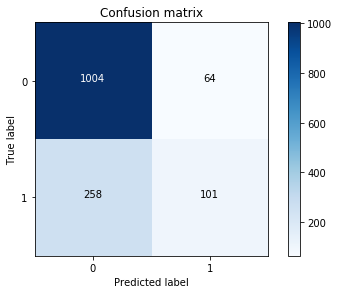

In [37]:
cnf_xgb=confusion_matrix(y_test,model_metrics(xgb,x_train,x_test,y_train,y_test)[1])
class_names=[0,1]
plot_confusion_matrix(cnf_xgb,class_names)

特征工程总结: 选取模型随机森林 1#初步的业务角度丢弃了9列，保留81列特征列分析(包含标签列status) 2#IV值筛选,大于0.02的值作为有效预测列，筛选得到71列 3#随机森林模型feature importance筛选,按照排序保留了30列作为最后的特征分析列 4#引入多个模型进行训练计算，并返回其精度,查准率,查全率等

### 补充以下
特征工程还可关系热力图进行筛选,此处没有展示(代码屏蔽), 还有卡方检验方法,后续进行尝试 1#将各列和标签列status的相关性进行计算线性相关性 2#筛选小于corr<0.05即认定为对标签列无影响的列进行删除 3#剩下的特征列中进一步筛选，用关系型热力图两两比较，大于0.90的只保留一列 后续思考：上述模型中计算出来的recall均不高,决策树模型反而可以做到最高的查全率,但是查准率却很低,如果综合考虑的话应该是xgboost模型最好,多个指标之间如何取舍(f1_score或者roc-auc score？）